## Assignment 9: Applications of dimensionality reduction techniques

- Name: Jahnavi Murali
- Reg No.: 3122 21 5001 038

## Imports

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, roc_curve, auc

## Data Loading and Concatenation

In [38]:
red_wine_data = pd.read_csv("./wine+quality/winequality-red.csv", sep=";")
white_wine_data = pd.read_csv("./wine+quality/winequality-white.csv", sep=";")

In [39]:
# for classification
red_wine_data['is_red_wine'] = 1
white_wine_data['is_red_wine'] = 0

# concatenation
wine_data = pd.concat([red_wine_data, white_wine_data], axis=0)


In [40]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


## Preprocessing & EDA

In [41]:
# Remove duplicates if any
if wine_data.index.duplicated().any():
    wine_data = wine_data[~wine_data.index.duplicated()]


In [42]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  is_red_wine           4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 535.7 KB


In [43]:
wine_data.isnull().value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH     sulphates  alcohol  quality  is_red_wine
False          False             False        False           False      False                False                 False    False  False      False    False    False          4898
Name: count, dtype: int64

In [44]:
# Summary statistics
print("Summary Statistics:")
print(wine_data.describe())

Summary Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        7.280063          0.359076     0.303949        5.246121   
std         1.400082          0.175912     0.144303        4.661065   
min         3.800000          0.085000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.900000   
50%         7.000000          0.310000     0.300000        2.800000   
75%         7.800000          0.440000     0.370000        7.800000   
max        15.900000          1.580000     1.230000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.059166            29.098612            106.603716     0.994797   
std       0.037585            17.932544             57.104232     0.003088   
min       0.009000          

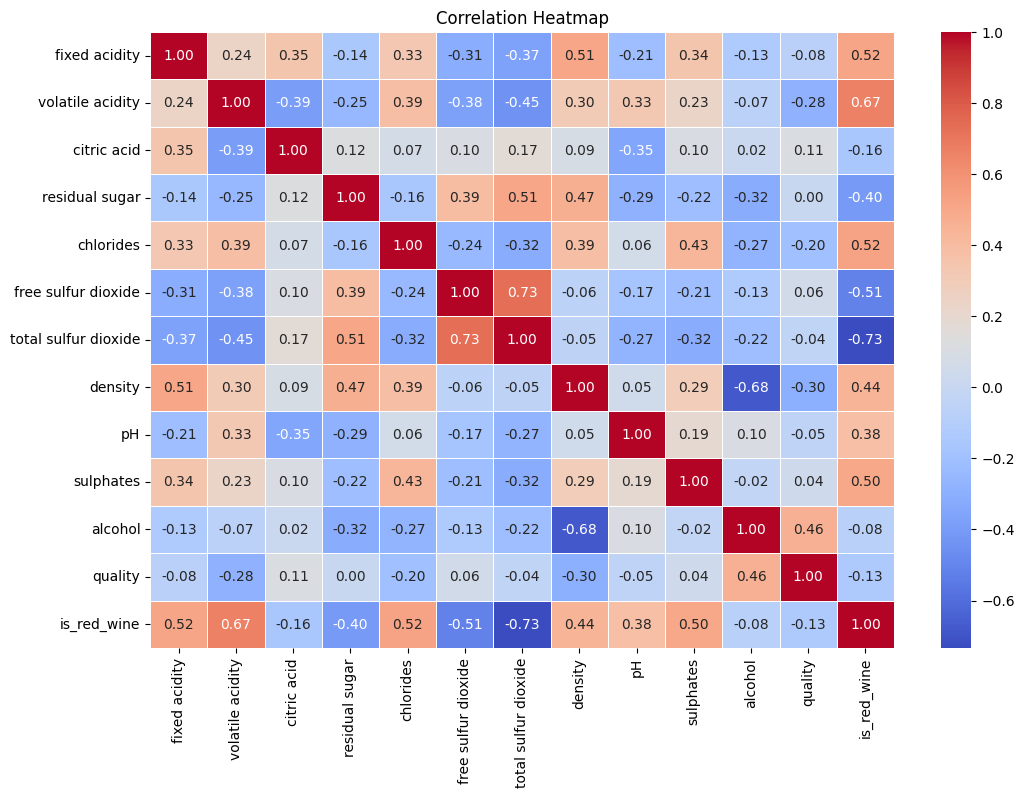

In [45]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [46]:
# Standardization of features
scaler = StandardScaler()
X = wine_data.drop(columns=['quality', 'is_red_wine'])
wine_data_scaled = scaler.fit_transform(X)

## Classification Task: Logistic Regression (Predict whether red wine or white wine)

### Train test split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(wine_data_scaled, wine_data['is_red_wine'], test_size=0.2, random_state=42)

### Dimensionality Reduction

#### PCA

In [70]:
pca = PCA() 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#### LDA

In [71]:
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

#### Modelling (Logistic Regression)

In [77]:
# trained and tested on principle components
log_reg_pca = LogisticRegression() 
log_reg_pca.fit(X_train_pca, y_train)
y_pred_pca = log_reg_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# trained and tested on linear discriminants
scaler = StandardScaler()
X_train_lda_scaled = scaler.fit_transform(X_train_lda)
X_test_lda_scaled = scaler.transform(X_test_lda)
log_reg_lda = LogisticRegression()  
log_reg_lda.fit(X_train_lda, y_train) 
y_pred_lda = log_reg_lda.predict(X_test_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)

print("Accuracy using PCA:", accuracy_pca)
print("Accuracy using LDA:", accuracy_lda)
y_train_pca_pred = log_reg_pca.predict(X_train_pca)

# check overfitting
accuracy_score(y_train, y_train_pca_pred)


Accuracy using PCA: 0.9948979591836735
Accuracy using LDA: 0.9948979591836735


0.9933639612046963

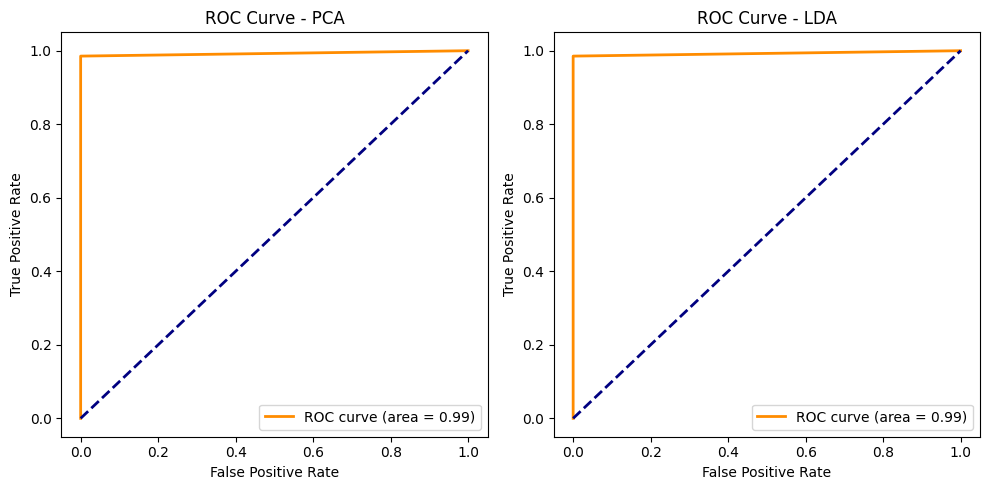

In [73]:
# Compute ROC curve and ROC area for PCA
fpr_pca, tpr_pca, _ = roc_curve(y_test, y_pred_pca)
roc_auc_pca = auc(fpr_pca, tpr_pca)

# Compute ROC curve and ROC area for LDA
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_pred_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)

# Plot ROC curves
plt.figure(figsize=(10, 5))

# Plot PCA ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr_pca, tpr_pca, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_pca)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - PCA')
plt.legend(loc='lower right')

# Plot LDA ROC curve
plt.subplot(1, 2, 2)
plt.plot(fpr_lda, tpr_lda, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lda)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LDA')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


## Regression Task: Predicting Quality (Linear Regression)

### Train Test Split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(wine_data_scaled, wine_data['quality'], test_size=0.2, random_state=42)

#### Dimenstionality Reduction

#### PCA

In [ ]:
pca = PCA() 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#### LDA

In [ ]:
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

#### Modelling (Linear Regression)

In [63]:
# trained and tested on principle components
lin_reg_pca = LinearRegression()
lin_reg_pca.fit(X_train_pca, y_train)
y_pred_pca_train = lin_reg_pca.predict(X_train_pca)
y_pred_pca_test = lin_reg_pca.predict(X_test_pca)
mse_pca_train = mean_squared_error(y_train, y_pred_pca_train)
mse_pca_test = mean_squared_error(y_test, y_pred_pca_test)

# trained and tested on linear discriminants
lin_reg_lda = LinearRegression()
lin_reg_lda.fit(X_train_lda, y_train)
y_pred_lda_train = lin_reg_lda.predict(X_train_lda)
y_pred_lda_test = lin_reg_lda.predict(X_test_lda)
mse_lda_train = mean_squared_error(y_train, y_pred_lda_train)
mse_lda_test = mean_squared_error(y_test, y_pred_lda_test)

print("Mean Squared Error using PCA (Train):", mse_pca_train)
print("Mean Squared Error using LDA (Train):", mse_lda_train)

print("Mean Squared Error using PCA (Test):", mse_pca_test)
print("Mean Squared Error using LDA (Test):", mse_lda_test)



Mean Squared Error using PCA (Train): 0.490684061343891
Mean Squared Error using LDA (Train): 0.6964343985967744
Mean Squared Error using PCA (Test): 0.5275084332205836
Mean Squared Error using LDA (Test): 0.7286094873560243


#### Plotting Results

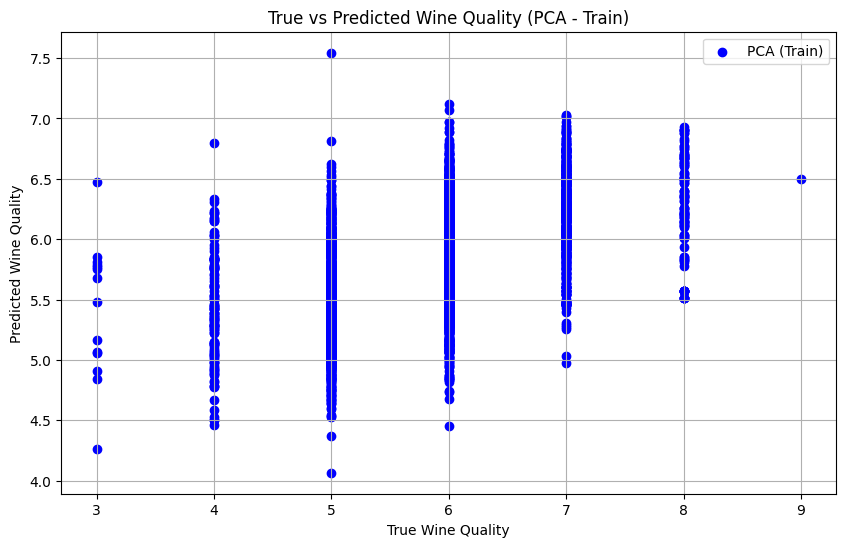

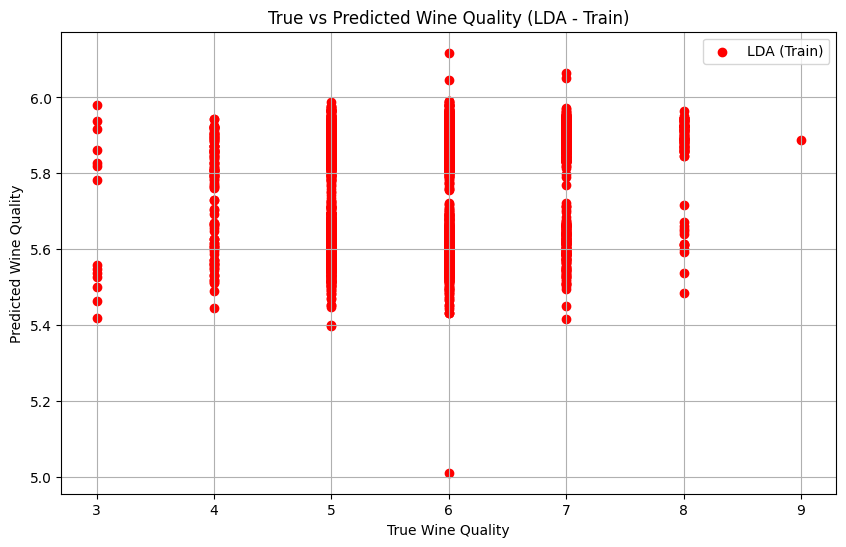

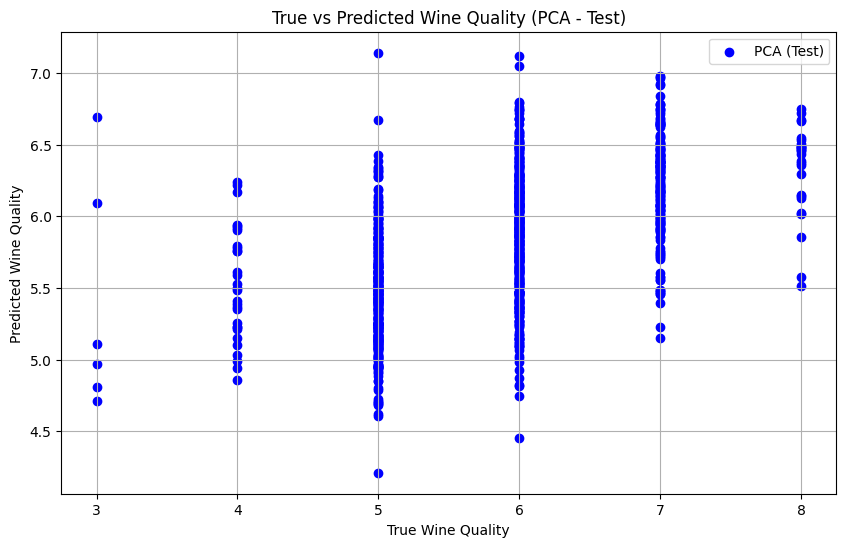

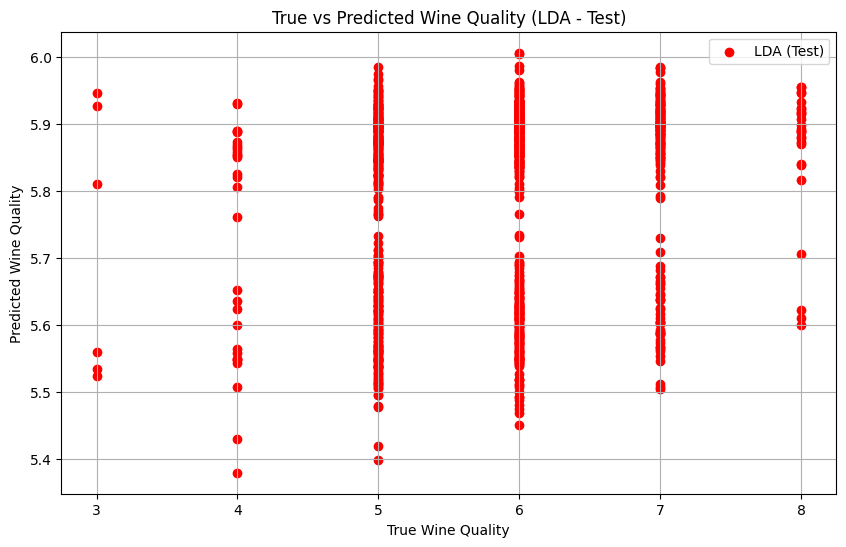

In [61]:
plt.figure(figsize=(10, 6))

# Plotting true vs predicted values for PCA (Training)
plt.scatter(y_train, y_pred_pca_train, color='blue', label='PCA (Train)')
plt.xlabel('True Wine Quality')
plt.ylabel('Predicted Wine Quality')
plt.title('True vs Predicted Wine Quality (PCA - Train)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))

# Plotting true vs predicted values for LDA (Training)
plt.scatter(y_train, y_pred_lda_train, color='red', label='LDA (Train)')
plt.xlabel('True Wine Quality')
plt.ylabel('Predicted Wine Quality')
plt.title('True vs Predicted Wine Quality (LDA - Train)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))

# Plotting true vs predicted values for PCA (Testing)
plt.scatter(y_test, y_pred_pca_test, color='blue', label='PCA (Test)')
plt.xlabel('True Wine Quality')
plt.ylabel('Predicted Wine Quality')
plt.title('True vs Predicted Wine Quality (PCA - Test)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))

# Plotting true vs predicted values for LDA (Testing)
plt.scatter(y_test, y_pred_lda_test, color='red', label='LDA (Test)')
plt.xlabel('True Wine Quality')
plt.ylabel('Predicted Wine Quality')
plt.title('True vs Predicted Wine Quality (LDA - Test)')
plt.legend()
plt.grid(True)
plt.show()


### Inference:

- From the above results we can infer that the models perform better on classification task than regression.



### Learning Outcomes

- Understood and implemented dimensionality reduction using LDA and PCA

### GitHub Repo Link

https://github.com/jahnavimurali/ML-Assignments